<a href="https://colab.research.google.com/github/Bluelord/EE524/blob/assignments/Assignment4/NileshGupta_206102031/EE524_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE524 Introduction to Machine Learning Lab**

## **Assignment 4**

Name: **Nilesh Gupta**, Ph.D. EEE Department. 

Roll No. **206102031**

In [171]:
# Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

**Answer 1 (a).**

**Univariate normal distribution**


The normal distribution , also known as the Gaussian distribution(based on the Gaussian function). This distribution is defined by two parameters: The mean $\mu$ and The standard deviation $\sigma$. The square of the standard deviation referred as the variance $\sigma ^2$

We denote this distribution as: $X\sim \mathcal N(\mu,\sigma^2)$.

The density is: $$P(x) = \frac{1}{\sigma \sqrt {2\pi}} \exp(- \frac{(x - \mu ^2)}{2 \sigma ^2})$$

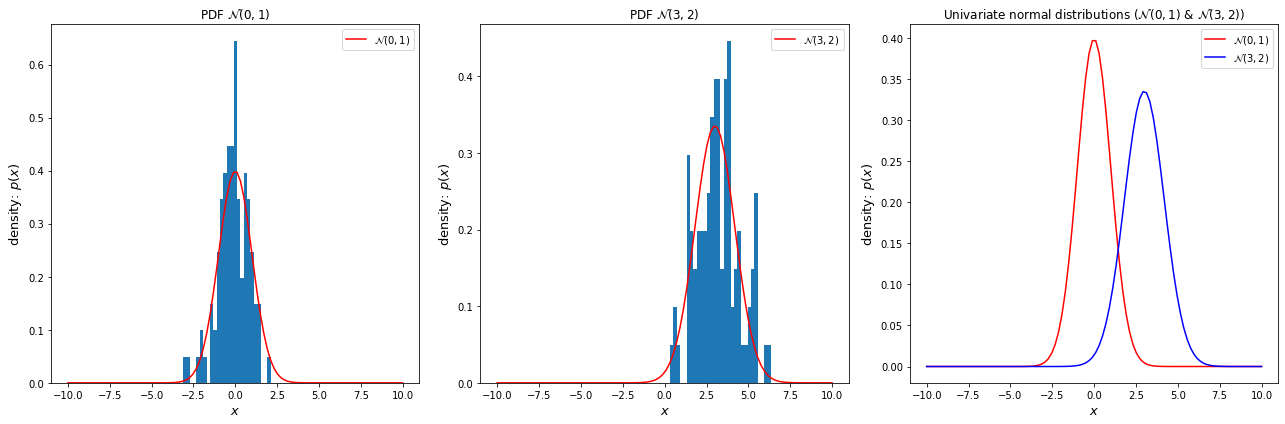

In [191]:
# Defining Univariate normal distribution equation
def univariate_normal(x, mean, variance):
    return ((1/ np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))

# Input x has 100 values in the range [-10,10].
x = np.linspace(-10,10, 100)

# Normal Distribution of x with mean=0, and SD=1 
mean, variance = 0, 1
ND = np.random.normal(mean, variance, 100)

fig, axs = plt.subplots(1, 3,figsize=(18,6), tight_layout=True)

axs[0].hist(ND, bins, density=True)
axs[0].set_xlabel('$x$', fontsize=13)
axs[0].set_ylabel('density: $p(x)$', fontsize=13)
axs[0].set_title('PDF $\mathcal{N}(0, 1)$')
axs[0].plot(x, univariate_normal(x, mean, variance),label="$\mathcal{N}(0, 1)$", color='r')
axs[2].plot(x, univariate_normal(x, mean, variance),label="$\mathcal{N}(0, 1)$", color='r')
axs[0].legend(loc=1)

# Normal Distribution of x with mean=3, and SD=2
mean, variance = 3, np.sqrt(2)
GD = np.random.normal(mean, variance, 100)
axs[1].hist(GD, bins, density=True)
axs[1].set_xlabel('$x$', fontsize=13)
axs[1].set_ylabel('density: $p(x)$', fontsize=13)
axs[1].set_title('PDF $\mathcal{N}(3,2)$')
axs[1].plot(x, univariate_normal(x, mean, variance),label="$\mathcal{N}(3,2)$", color='r')
axs[2].plot(x, univariate_normal(x, mean, variance),label="$\mathcal{N}(3,2)$", color='b')
axs[1].legend(loc=1)

axs[2].set_xlabel('$x$', fontsize=13)
axs[2].set_ylabel('density: $p(x)$', fontsize=13)
axs[2].set_title('Univariate normal distributions ($\mathcal{N}(0, 1)$ & $\mathcal{N}(3, 2)$)')
axs[2].legend(loc=1)
plt.show()


The spreading of a Univariate normal distribution curve depands on the values $\sigma$, higher the value of $\sigma$ more is the spread out of distribution.
As area under the curve = 1, the peak of the curve is inversely related to $\sigma$, \sigma increases, peak decreases. Mean values decides the position normal distribution from which the spreadout begins.

**Peak** of $X\sim \mathcal N(0,1) > X\sim \mathcal N(3,2)$

$X\sim \mathcal N(3,2)$ is more spread out then $X\sim \mathcal N(0,1)$

**Answer 1 (b).**

Like the Univariate normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mu$, and The covariance matrix $\Sigma$, which measures how dependend two random variables are and how they change together. We denote this distribution as: $X\sim \mathcal N(\mu,\Sigma)$.

The multivariate normal with dimensionality $d$ has a joint probability density given by: $$P(x| \mu, \Sigma) = \frac{1}{\sqrt {2\pi^d |\Sigma|} } \exp(- \frac{1}{2}(x - \mu ^2)^T \Sigma ^{-1} (x - \mu ^2))$$

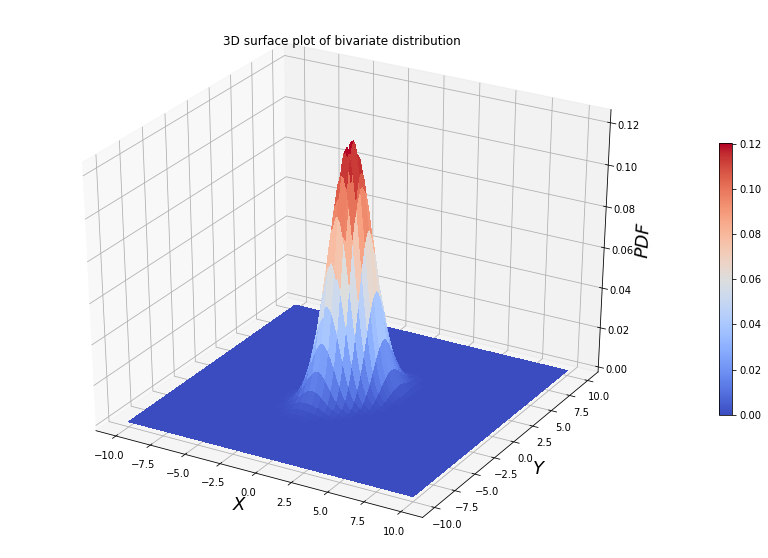

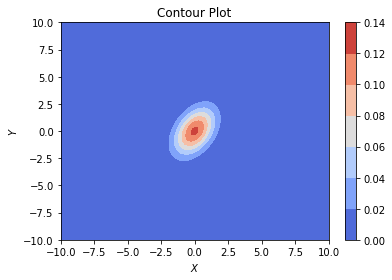

In [196]:
# Defining Multivariate normal distribution equation
def multivariate_normal(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

# Mean vector and covariance matrix
mean = np.array([[0], [0]])
covariance = np.array([[ 1. , 0.6],
                       [0.6,  2]])
d = 2
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)
pdf = np.zeros((N, N))
# Filling the matrix for each combination of X & Y
for i in range(N):
  for j in range(N):
    pdf[i,j] = multivariate_normal(np.matrix([[X[i,j]],
                                              [Y[i,j]]]),
                                   d, mean, covariance)
Z = pdf

# 3D surface plot of bivariate distribution (pdf)
fig = plt.figure(figsize=(15,10))        
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5)
ax.set_title('3D surface plot of bivariate distribution', fontsize=12)
ax.set_xlabel('$X$', fontsize=18)
ax.set_ylabel('$Y$', fontsize=18)
ax.set_zlabel('$PDF$', fontsize=18)
plt.show()

# Countour plot of bivariate distribution
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, cmap=plt.cm.coolwarm)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
plt.show()